In [12]:
import pandas as pd

df = pd.read_excel('./EPH_usu_1er_Trim_2022_xlsx/usu_individual_T122.xlsx')

Eliminamos todos los aglomerados que no correspondan a CABA (cód 32) o GBA (cód 33)

In [43]:
print(len(df))

df_cortado = df.query("AGLOMERADO in (32, 33)") # la manera mas rapida y facil de hacerlo

print(len(df_cortado))

df_cortado.sample(10)

49706
6706


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
42934,TQRMNORSQHMKPRCDEIJAH00780869,2022,1,1,4,1,1,S,33,2323,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
47469,TQRMNOPPYHJKLNCDEIJAH00780927,2022,1,1,2,1,1,S,33,706,...,NaN,5,43000.00,6,NaN,6,6.0,NaN,7,1249
34809,TQRMNOPUSHLKRTCDEIJAH00780732,2022,1,1,1,1,1,S,33,2474,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
8981,TQRMNOQXUHJMOMCDEIIAD00718411,2022,1,1,4,1,1,S,32,1462,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
30976,TQRMNOQWYHKNQLCDEIJAH00780692,2022,1,1,3,1,1,S,33,2442,...,NaN,9,64333.33,8,NaN,8,8.0,NaN,9,5077
47767,TQSMNORUQHKOQQCDEIJAH00780934,2022,1,1,2,1,1,S,33,3232,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
5942,TQRMNOQVTHJMLPCDEIJAH00698167,2022,1,1,4,0,1,S,33,2392,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
25349,TQRMNORWYHLNRMCDEIJAH00719242,2022,1,1,8,1,1,S,33,5409,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
37080,TQRMNORUTHKOSOCDEIJAH00780795,2022,1,1,3,1,1,S,33,4095,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0
26089,TQRMNOQYYHMMNPCDEIIAD00779997,2022,1,1,2,1,1,S,32,1691,...,NaN,12,0.00,12,NaN,12,12.0,NaN,12,0


In [46]:
df_cortado = df_cortado.query("CH06 >= 0") # edad mayor a 0+
df_cortado = df_cortado.query("PP08D1 >= 0") # ingresos mayor a 0
df_cortado = df_cortado.query("PP08D4 >= 0") # ingresos mayor a 0
df_cortado = df_cortado.query("PP08F1 >= 0") # ingresos mayor a 0
df_cortado = df_cortado.query("PP08F2 >= 0") # ingresos mayor a 0
df_cortado = df_cortado.query("PP08J1 >= 0") # ingresos mayor a 0
df_cortado = df_cortado.query("PP08J2 >= 0") # ingresos mayor a 0
df_cortado = df_cortado.query("PP08J3 >= 0") # ingresos mayor a 0

print(len(df_cortado))

2324


Gráfico de barras composición por sexo

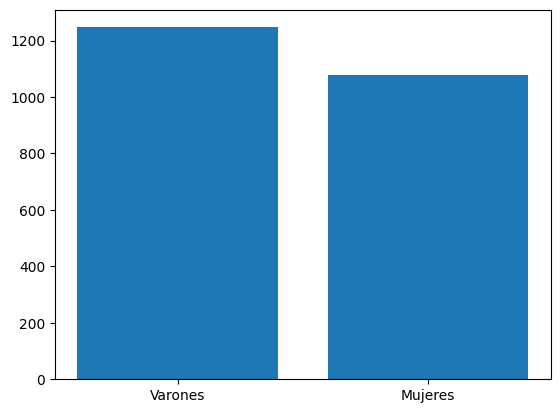

1077

In [58]:
import matplotlib.pyplot as plt

varones = df_cortado.query("CH04 == 1")
mujeres = df_cortado.query("CH04 == 2")

plt.bar(['Varones', 'Mujeres'], [len(varones), len(mujeres)]) # esto pide?
plt.show()